<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

#### Pantea Amoie 
#### Student Number : 400101656

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

In [2]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [3]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [4]:
npR

array([[-1.0545, -1.3448, -0.8768, -1.184 , -0.5211],
       [ 0.    ,  0.6971,  0.7861,  0.7584,  0.5737],
       [ 0.    ,  0.    ,  0.6522,  0.2173,  0.5232],
       [ 0.    ,  0.    ,  0.    , -0.3948,  0.2416],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.5312]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [5]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    
    for j in range(n):
        q = A[:, j]
        for c in range(j):
            R[c, j] = np.dot(Q[:, c], A[:, j])
            q = q - R[c, j] * Q[:, c]
            
        Q[:, j] = q / np.linalg.norm(q)
        R[j, j] = np.linalg.norm(q)
        
    return Q, R

In [6]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [7]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [8]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [9]:
def mgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    
    for j in range(n):
        q = A[:, j]
        for c in range(j):
            R[c, j] = np.dot(Q[:, c], q)
            q = q - R[c, j] * Q[:, c]
            
        Q[:, j] = q / np.linalg.norm(q)
        R[j, j] = np.linalg.norm(q)
        
    return Q, R

In [10]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [11]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [13]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [14]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

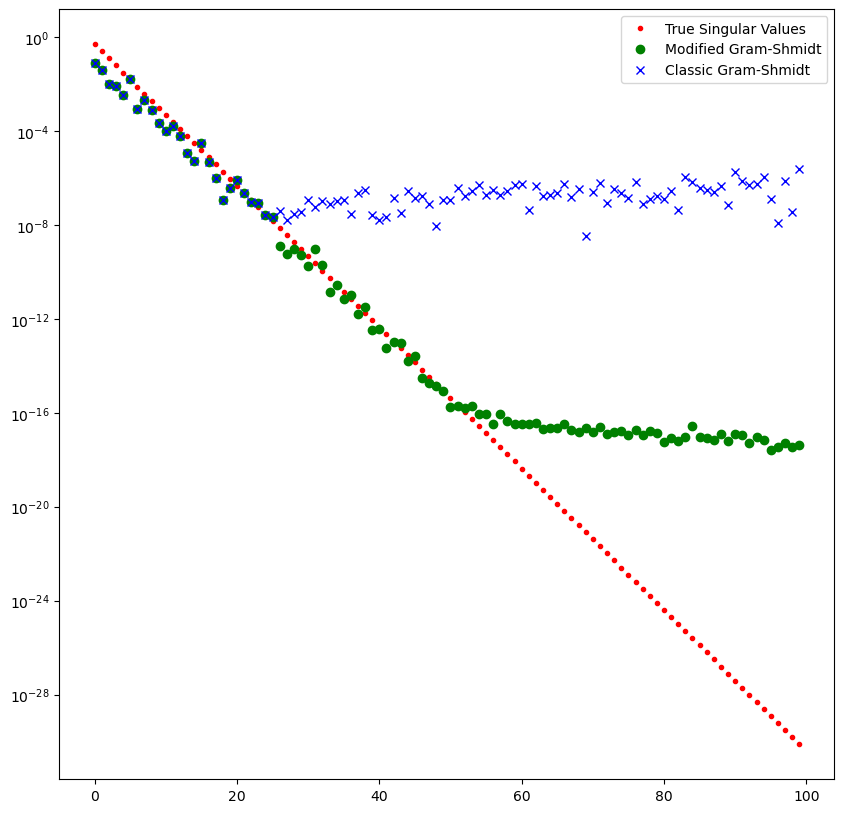

In [15]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [16]:
def qr_eigen(matrix, n):
    for i in range(1, n + 1):
        Q, R = mgs(matrix)
        matrix = np.dot(R, Q)

        if i in [1, 5, 10, 20, 100]:
            eigenvalues = np.diag(matrix)
            print(f"Iteration {i}: Eigenvalues = {np.sort(eigenvalues)}")

    return np.diag(matrix)

In [17]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])

print("\n --- qr_eigen Function ---")
eigenvalues = qr_eigen(A, 100)

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]

 --- qr_eigen Function ---
Iteration 1: Eigenvalues = [0. 2. 2. 3.]
Iteration 5: Eigenvalues = [-0.247   1.4541  2.7929  3.    ]
Iteration 10: Eigenvalues = [-0.247   1.4451  2.8019  3.    ]
Iteration 20: Eigenvalues = [-0.247   1.445   2.8019  3.    ]
Iteration 100: Eigenvalues = [-0.247   1.445   2.8019  3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

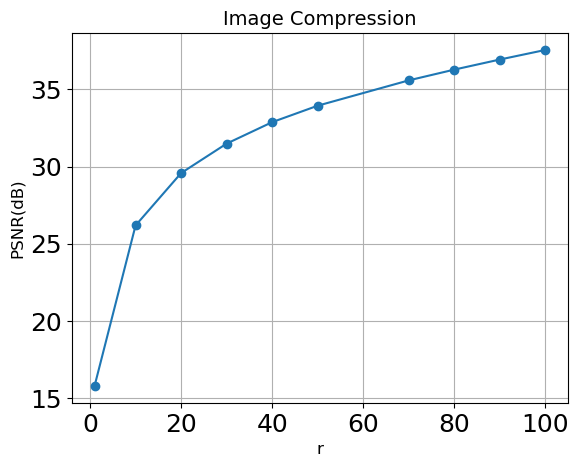

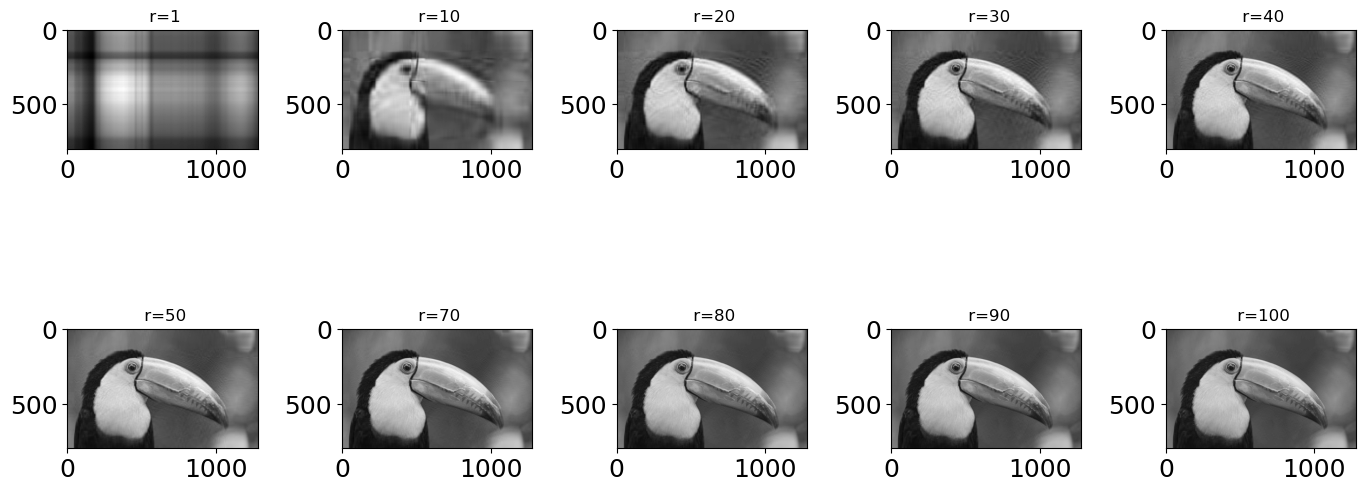

In [18]:
def svd_compression(image, rvals):

    U, sigma, VT = np.linalg.svd(image, full_matrices=False)
    psnr_vals = []

    for r in r_vals:
        U_new = U[:, 0:r]
        sigma_new = np.diag(sigma[0:r])
        VT_new = VT[0:r, :]

        # reconstruct the image using new U, sigma and VT
        new_image = np.dot(U_new, np.dot(sigma_new, VT_new))
        # calculate psnr values using its formula
        MSE = np.mean((image - new_image) ** 2)
        psnr = 10 * np.log10((255 ** 2) / MSE)
        psnr_vals.append(psnr)
        
    return psnr_vals

def plt_psnr(psnr_vals):
    # plot psnr values vs r values
    plt.figure()
    plt.plot(r_vals, psnr_vals, marker='o')
    plt.title('Image Compression', fontsize=14)  
    plt.xlabel('r', fontsize=12)  
    plt.ylabel('PSNR(dB)', fontsize=12)  
    plt.grid(True)
    plt.show()
    
def svd_image_generator(image, r):

    U, sigma, VT = np.linalg.svd(image, full_matrices=False)
    psnr_vals = []

    U_new = U[:, 0:r]
    sigma_new = np.diag(sigma[0:r])
    VT_new = VT[0:r, :]

    # reconstruct the image using new U, sigma and VT
    new_image = np.dot(U_new, np.dot(sigma_new, VT_new))
        
    return new_image

image_address = "pic.jpg"
image = cv2.imread(image_address, cv2.IMREAD_GRAYSCALE)
r_vals = [1, 10, 20, 30, 40, 50, 70, 80, 90, 100]
psnr_vals = svd_compression(image, r_vals)
plt_psnr(psnr_vals)

def plot_images(image, r_vals, txt):
    plt.figure(figsize=(14, 7))
    idx = 1
    for r in r_vals:
        plt.subplot(2, 5, idx)
        new_image = svd_image_generator(image, r)
        plt.imshow(new_image, cmap='gray')
        plt.title(txt+" r=" + str(r), fontsize=12) 
        idx += 1
    plt.tight_layout()
    plt.show()
    return

plot_images(image, r_vals, "")

#### Explanation of the Results: 
PSNR is a metric used to evaluate the quality of a reconstructed image compared to the original image. It measures the ratio of the peak signal power to the power of the noise. Therefore higher PSNR values indicate better reconstruction quality.<br>
As r increases, meaning more singular values are retained, the PSNR generally increases and the image will have higher quality. We expected this result because retaining more singular values helps us preserve more information from the original image.

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


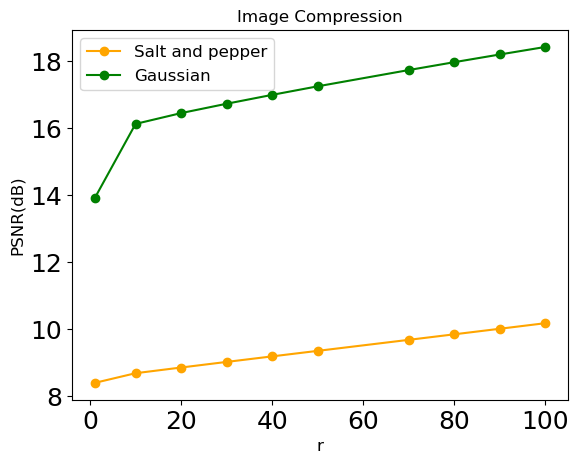

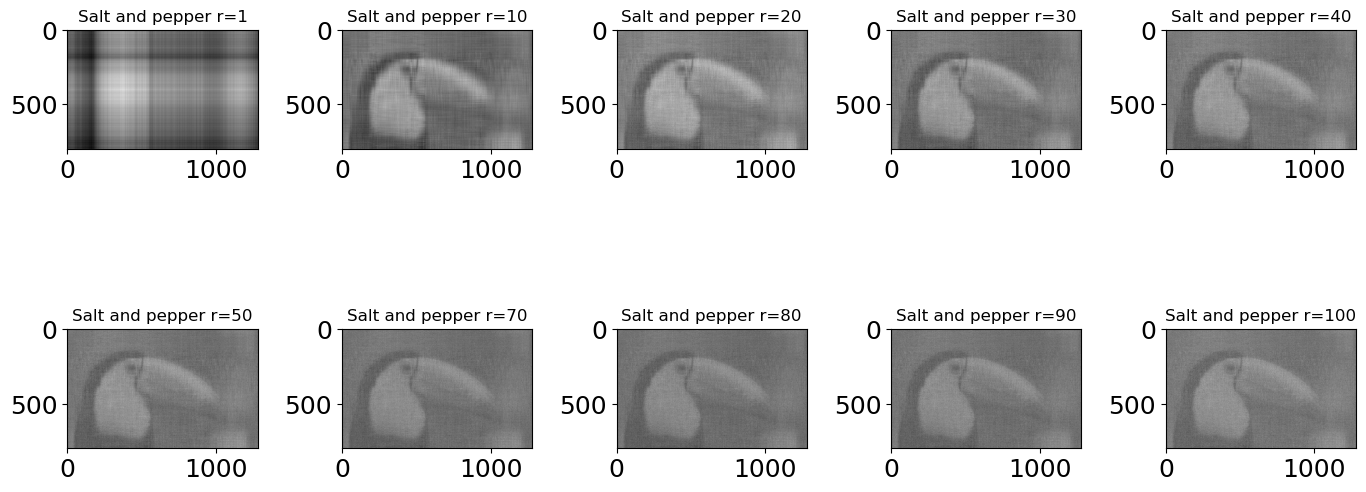

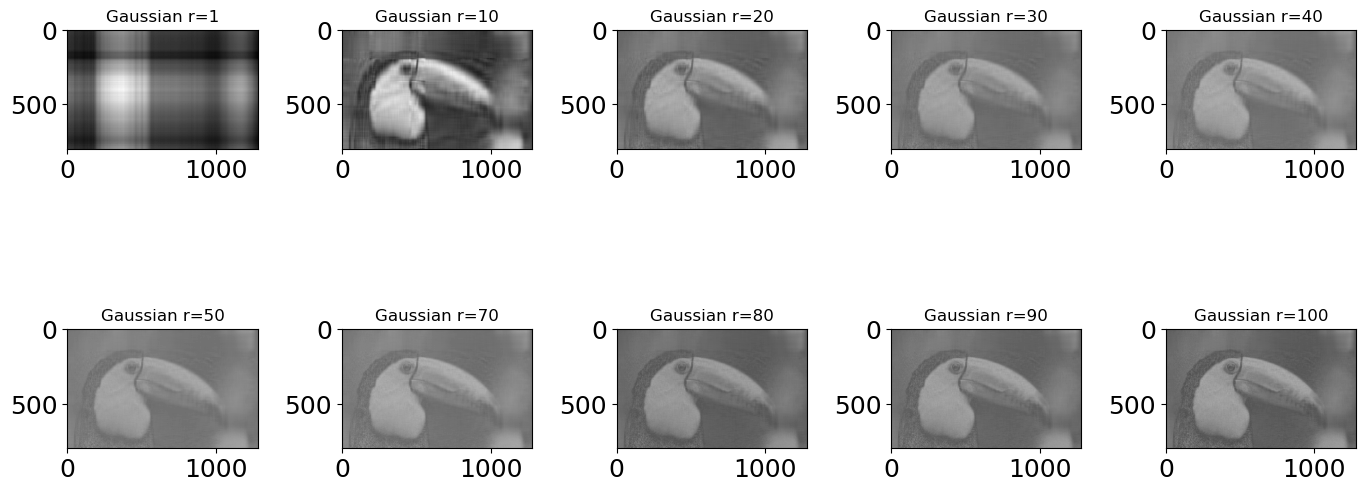

In [19]:
def salt_and_pepper_noise(image, salt_prob, pepper_prob):
    prob_matrix = np.random.rand(image.shape[0], image.shape[1])
    noisy_image = image.copy()
    
    probability = 0.5
    noisy_image[prob_matrix < probability / 2] = 0   # based on the threshold probability
    noisy_image[prob_matrix > 1 - probability / 2] = 255 
    
    return noisy_image
    
def gaussian_noise(image, mean, std):
    
    gaussian_noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + gaussian_noise.astype(np.uint8)
    noisy_image = np.clip(noisy_image, 0, 255)
    
    return noisy_image

def plt_2psnr(psnr_vals1, psnr_vals2):
    # plot psnr values vs r values
    plt.figure()
    plt.plot(r_vals, psnr_vals1, marker='o', color="orange", label='Salt and pepper')
    plt.plot(r_vals, psnr_vals2, marker='o', color="green", label='Gaussian')
    plt.title('Image Compression', fontsize=12)
    plt.xlabel('r', fontsize=12)
    plt.ylabel('PSNR(dB)', fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

image_address = "pic.jpg"
image = cv2.imread(image_address, cv2.IMREAD_GRAYSCALE) 
salt_and_pepper_image = salt_and_pepper_noise(image, 0.01, 0.01)
gaussian_image = gaussian_noise(image, 0, 25)

r_vals = [1, 10, 20, 30, 40, 50, 70, 80, 90, 100]
salt_and_pepper_psnr = svd_compression(salt_and_pepper_image, r_vals)
gaussian_psnr = svd_compression(gaussian_image, r_vals)
plt_2psnr(salt_and_pepper_psnr, gaussian_psnr)

plot_images(salt_and_pepper_image, r_vals, "Salt and pepper")
plot_images(gaussian_image, r_vals, "Gaussian")

#### Explanation of the Results:
As we can see from the diagram above, the image with gaussian type of noise has higher PSNR for different values of r and therefore this type of noise is better reduced using the SVD-based method . This is because Gaussian noise is characterized by a smooth and continuous distribution of pixel intensity variations, resembling a normal distribution. This type of noise typically affects the entire image uniformly and is less visually noticeable. Since Gaussian noise is more predictable and has a smoother distribution, it can be effectively reduced by denoising algorithms, such SVD.

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.preprocessing import StandardScaler

### Import Dataset

In [21]:
Datapoint = pd.read_csv('Datapoint.csv')

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

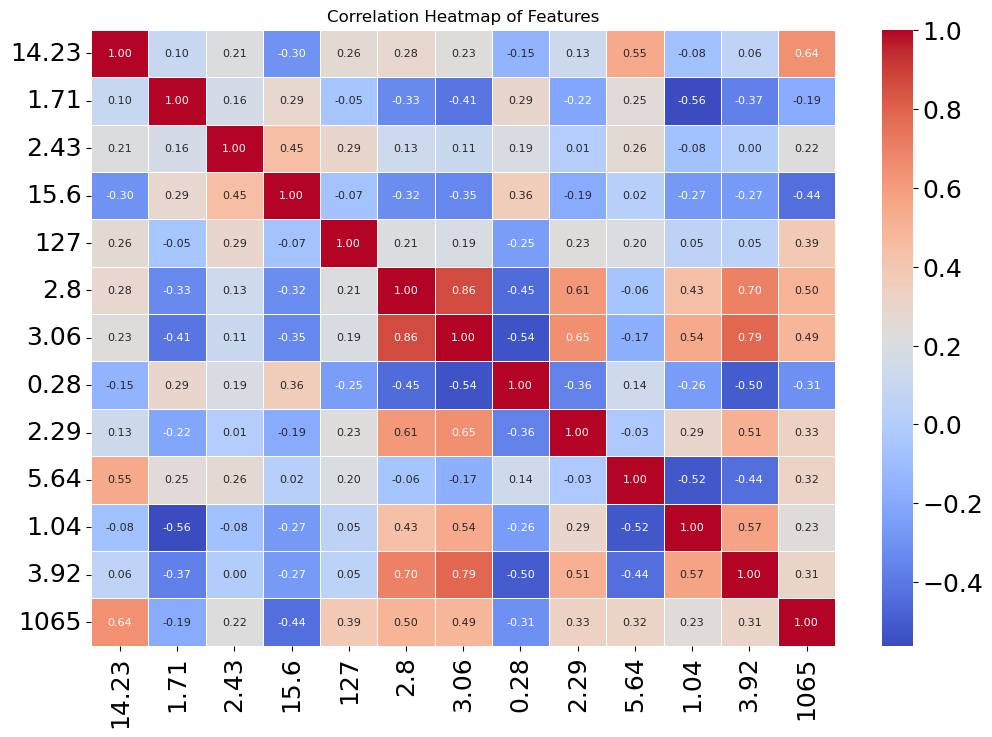

In [22]:
corr_matrix = Datapoint.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 8})  
plt.title('Correlation Heatmap of Features', fontsize=12)  
plt.show()

#### Explanation:
Each cell in the heatmap represents the correlation coefficient between two features.
Darker colors (closer to -1 or 1) indicate stronger correlations, while lighter colors (closer to 0) suggest weaker correlations.The high correlation means that an increase in one variable can expect an increase in another variable in a linear fashion. High correlation suggests redundancy or similarity between features. Keeping both features might be redundant, and combining them into a single principal component can be considered. Principal Components capture the maximum variance in the data.
If you observe a cluster of strongly correlated features (dark squares), these features might be effectively captured by a smaller number of principal components.

###  Data Preprocessing

In [23]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

C:\Users\LEGION\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


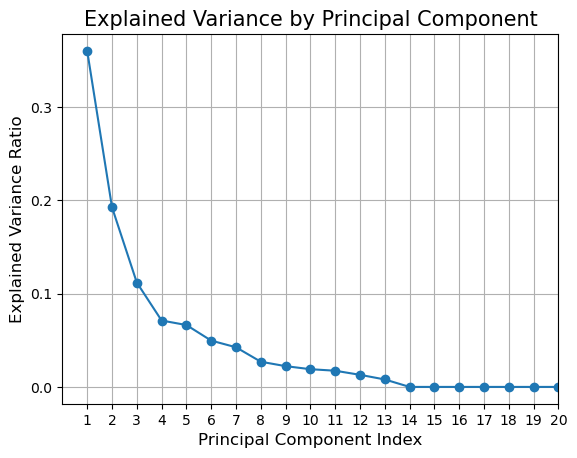

In [25]:
# standardize(centerize) features by removing the mean and scaling to unit variance
scaler = StandardScaler()
centered_data = scaler.fit_transform(Datapoint)

# calculate the covariance matrix
n = centered_data.shape[0] # it is actually n - 1 = 177
cov_matrix = np.dot(centered_data, np.transpose(centered_data)) / n 

# calculate the eigenvalues and eigenvactors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# plot explained variance by each principal component
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, step=1))
plt.tick_params(axis='x', labelsize=10)  
plt.yticks(fontsize=10)  
plt.xlim([0, 20])
plt.grid(True)
plt.title('Explained Variance by Principal Component', fontsize=15)
plt.show()

#### Explanation:
We should look for an "elbow" or a point where adding more components provides diminishing returns in terms of explained variance. We can see that n = 3 is a good choice for the elbow point.

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [26]:
# standardize(centerize) features by removing the mean and scaling to unit variance
centered_data = (Datapoint - np.mean(Datapoint)) / np.std(Datapoint)

# calculate the covariance matrix
n = centered_data.shape[0] # it is actually n - 1 = 177
cov_matrix = np.dot(np.transpose(centered_data), centered_data) / n

# calculate the eigenvalues and eigenvactors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# reduce the number of features to n(top n values)
n = 3
reduced_eigenvectors = eigenvectors[:, :n]

# project the centered data onto the selected eigenvectors to obtain the reduced features
reduced_features = np.dot(centered_data, reduced_eigenvectors)
print(reduced_features)

pca_std_datapoint = np.real(reduced_features)


[[-2.2302  0.3023 -2.0329]
 [-2.5319 -1.0623  0.9767]
 [-3.7547 -2.8053 -0.1804]
 [-1.0201 -0.8884  2.0239]
 [-3.0492 -2.17   -0.6387]
 [-2.4582 -1.2071 -0.9882]
 [-2.0616 -1.6405  0.1438]
 [-2.5184 -0.9608 -1.7824]
 [-2.768  -0.8245 -0.989 ]
 [-3.4892 -1.3552 -0.4293]
 [-1.7664 -0.6467 -1.2022]
 [-2.1287 -0.7104 -0.8803]
 [-3.4665 -1.1821 -1.2274]
 [-4.3136 -2.1547 -1.2779]
 [-2.3085 -1.7009  0.207 ]
 [-2.1675 -2.367   0.8262]
 [-1.9022 -1.6678  0.7875]
 [-3.5401 -2.5734 -0.4989]
 [-2.0927 -1.0889 -0.1641]
 [-3.1319 -0.8283 -0.3585]
 [-1.108  -0.2525  0.9362]
 [-2.5576  0.0603 -0.3174]
 [-1.6726  0.495   0.1364]
 [-1.7879  0.2947  0.8822]
 [-1.0022 -0.9576  3.8167]
 [-1.7925 -0.711  -0.1009]
 [-1.2552  0.0619 -1.3932]
 [-2.2031 -0.7221  1.3821]
 [-2.274  -0.2224 -1.0976]
 [-2.5122 -1.2831  1.3748]
 [-2.6852 -1.5152 -0.3362]
 [-1.645  -0.0837 -0.1756]
 [-1.9022 -1.6695  1.1676]
 [-1.4213 -0.7259  0.4735]
 [-1.9252 -0.2034  0.4485]
 [-1.3951 -0.6833  0.4464]
 [-1.1401 -0.1405 -0.0502]
 

C:\Users\LEGION\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

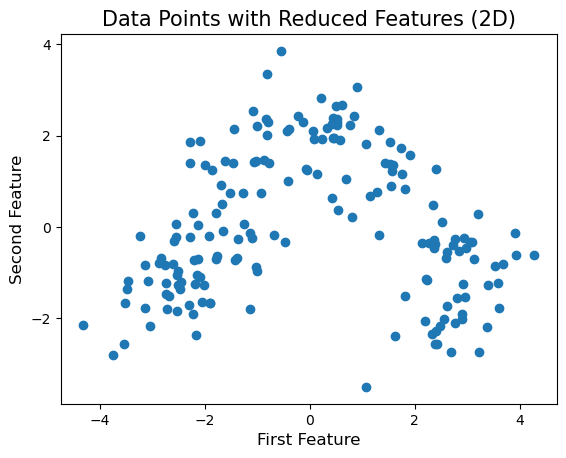

In [27]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('First Feature', fontsize=12)
plt.ylabel('Second Feature', fontsize=12)
plt.title('Data Points with Reduced Features (2D)', fontsize=15)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10) 
plt.show()

We can see from above that we have 3 clusters.

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




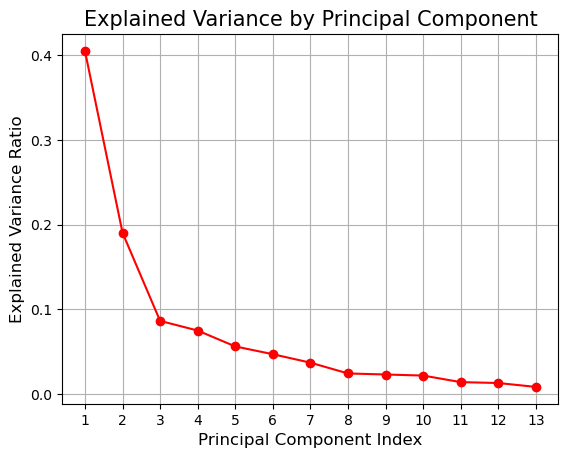

In [28]:
from sklearn.preprocessing import MinMaxScaler
# standardize features using Min Max scaling
# from scratch mthod:
# data_min = Datapoint.min(axis=0)
# data_max = Datapoint.max(axis=0)
# data_std = (Datapoint - data_min) / (data_max - data_min)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Datapoint)

# calculate the covariance matrix
n = scaled_data.shape[0] # it is actually n - 1 = 177
# cov_matrix = np.dot(np.transpose(scaled_data), scaled_data) / n 
cov_matrix = np.cov(scaled_data.T)

# calculate the eigenvalues and eigenvactors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# plot explained variance by each principal component
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', color="r")
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, step=1))
plt.tick_params(axis='x', labelsize=10)  
plt.yticks(fontsize=10)  
plt.grid(True)
plt.title('Explained Variance by Principal Component', fontsize=15)
plt.show()


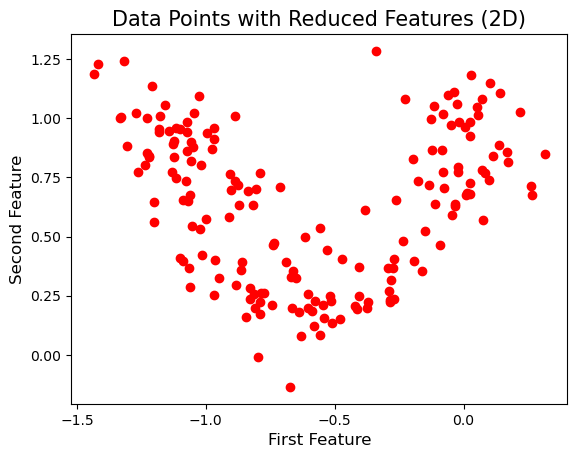

In [29]:
# reduce the number of features to n(top n values)
n = 3
minmax_reduced_eigenvectors = eigenvectors[:, :n]

# project the centered data onto the selected eigenvectors to obtain the reduced features
minmax_reduced_features = np.dot(scaled_data, minmax_reduced_eigenvectors)

minmax_pca_std_datapoint = np.real(minmax_reduced_features)
plt.scatter(minmax_reduced_features[:, 0], minmax_reduced_features[:, 1], color='r')
plt.xlabel('First Feature', fontsize=12)
plt.ylabel('Second Feature', fontsize=12)
plt.title('Data Points with Reduced Features (2D)', fontsize=15)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.show()

With StandardScaler, the scaled data has a mean of 0 and a standard deviation of 1, resulting in values typically centered around 0 and ranging between negative and positive values. With MinMaxScaler, the scaled data is constrained to a specific range (usually between 0 and 1), preserving the original range of the data. The choice of scaling method can affect the principal components obtained from PCA. StandardScaler emphasizes the variance of the data, while MinMaxScaler preserves the relative relationships and distributions of the features. We can observe some differences in the explained variance ratio between the two scaling methods. 

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


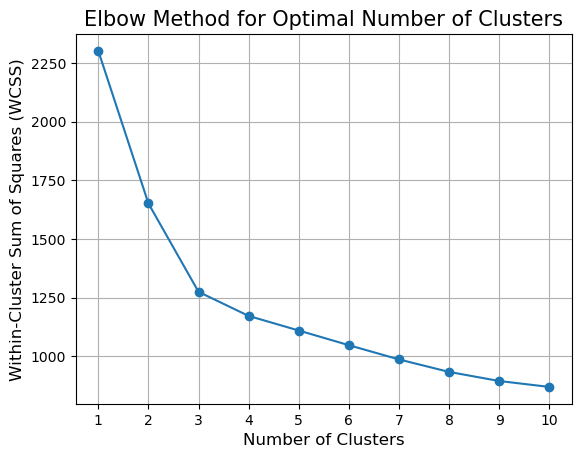

In [30]:
# calculate wcss for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(centered_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=15)  
plt.xlabel('Number of Clusters', fontsize=12)  
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12) 
plt.grid(True)
plt.xticks(np.arange(1, len(wcss) + 1, step=1), fontsize=10)  
plt.yticks(fontsize=10)  
plt.show()

As we can see, the elbow point is at k=3. So the optimal number of clusters is 3.

What is inertia and silhouette metrics?
Explain them briefly.

Inertia and silhouette metrics are both used to evaluate the performance of clustering algorithms, such as KMeans clustering, but they measure different aspects of cluster quality.<br>
Inertia measures the compactness of clusters. It is calculated as the sum of squared distances between each data point and its nearest cluster centroid.
A lower inertia indicates that the clusters are tighter and more compact, meaning that the data points within each cluster are closer to their cluster centroid.
Inertia is typically used in the elbow method to determine the optimal number of clusters, where we look for the "elbow point" in the inertia plot to identify the appropriate number of clusters.<br>
The silhouette score measures the separation between clusters and the cohesion within clusters.
For each data point, the silhouette score quantifies how similar it is to its own cluster (cohesion) compared to other clusters (separation).
The silhouette score ranges from -1 to 1, where a higher score indicates better-defined clusters. A score closer to 1 means that data points are well-clustered and distant from neighboring clusters, while a score closer to -1 indicates overlapping clusters.
The average silhouette score across all data points is often used as an overall measure of clustering quality. Higher average silhouette scores indicate better clustering.

In [31]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 10.57it/s]


In [32]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 10.77it/s]


Plot the **inertia** and **silhouette ** values

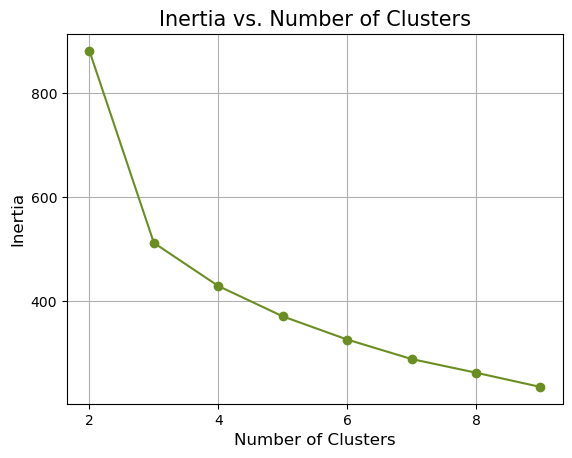

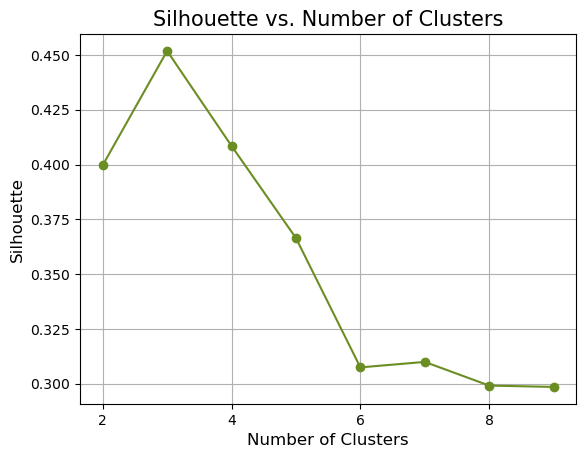

In [33]:
plt.plot(range(2, 10), inertia, marker='o', color="olivedrab")
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Inertia vs. Number of Clusters', fontsize=15)
plt.grid(True)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.show()

plt.plot(list(silhouette.keys()), list(silhouette.values()), marker='o', color="olivedrab")
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette', fontsize=12)
plt.title('Silhouette vs. Number of Clusters', fontsize=15)
plt.grid(True)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.show()

Tune the hyper parameters based on your conclusions.

In [35]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)

#Now plot the datapoints usig two first features
(Each cluster in a different colour)

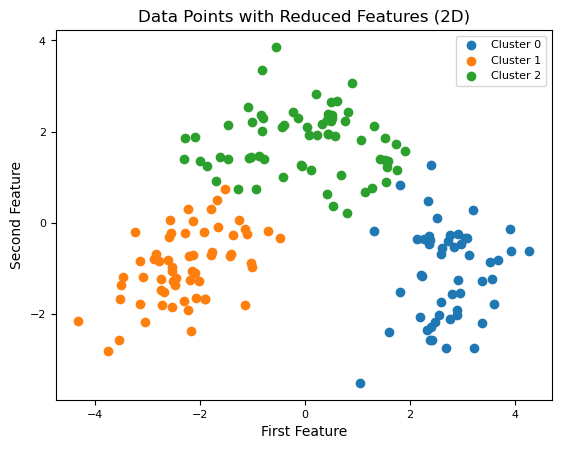

In [36]:
unique_labels = set(y_predict_kmeans1)
for label in unique_labels:
    cluster_points = pca_std_datapoint[y_predict_kmeans1 == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')

plt.xlabel('First Feature', fontsize=10)  
plt.ylabel('Second Feature', fontsize=10)  
plt.title('Data Points with Reduced Features (2D)', fontsize=12) 
plt.legend(loc='upper right', fontsize=8)  
plt.xticks(fontsize=8)  
plt.yticks(fontsize=8)  
plt.show()

Do all previous steps for MinMax scaled data points.





C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


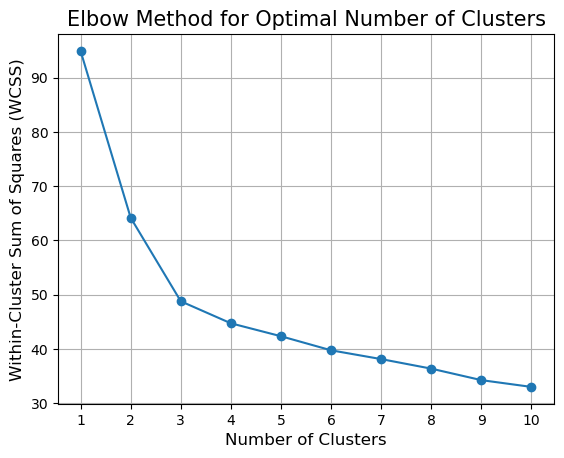

In [37]:
# calculate wcss for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=15)  
plt.xlabel('Number of Clusters', fontsize=12)  
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12) 
plt.grid(True)
plt.xticks(np.arange(1, len(wcss) + 1, step=1), fontsize=10)  
plt.yticks(fontsize=10)  
plt.show()

As we can see from above, the elbow is at n = 3, so this method also has 3 clusters.

In [38]:
#You should save your final datapoints in minmax_pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(minmax_pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 11.84it/s]


In [39]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(minmax_pca_std_datapoint)
    silhouette[i] = sil(minmax_pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 11.42it/s]


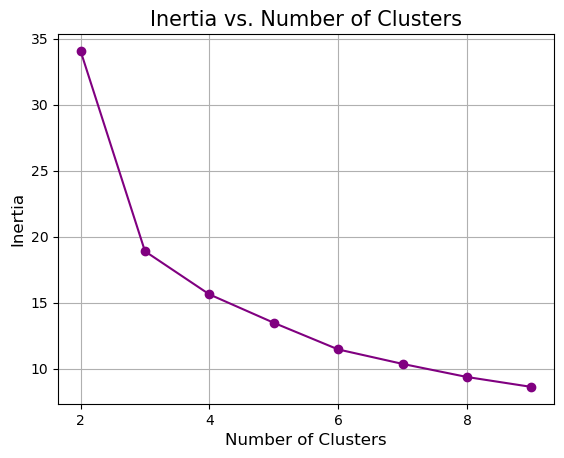

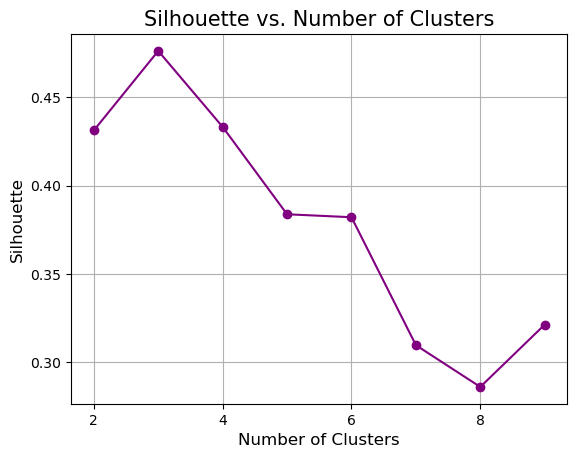

In [40]:
plt.plot(range(2, 10), inertia, marker='o', color="purple")
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Inertia vs. Number of Clusters', fontsize=15)
plt.grid(True)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.show()

plt.plot(list(silhouette.keys()), list(silhouette.values()), marker='o', color="purple")
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette', fontsize=12)
plt.title('Silhouette vs. Number of Clusters', fontsize=15)
plt.grid(True)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.show()

In [41]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(minmax_pca_std_datapoint)

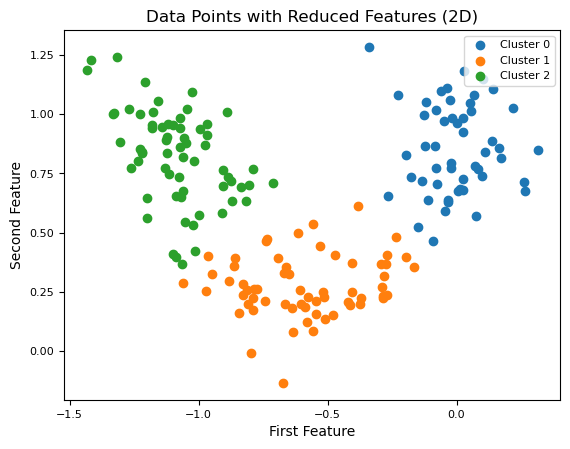

In [42]:
unique_labels = set(y_predict_kmeans1)
for label in unique_labels:
    cluster_points = minmax_pca_std_datapoint[y_predict_kmeans1 == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')

plt.xlabel('First Feature', fontsize=10)  
plt.ylabel('Second Feature', fontsize=10)  
plt.title('Data Points with Reduced Features (2D)', fontsize=12) 
plt.legend(loc='upper right', fontsize=8)  
plt.xticks(fontsize=8)  
plt.yticks(fontsize=8)  
plt.show()

Compare the results of different scaling methods in a PCA problem

We saw that the number of clusters in MinMax method was lower than the number of clusters in Standard scaler method. We visually compare the plots to assess the separation and compactness of clusters. A better clustering result would show more distinct and compact clusters with minimal overlap between clusters. So the two methods are the same from this aspect beacause they both have 3 clusters. Inertia measures how well the data points are clustered within each cluster. Lower inertia indicates better clustering. As we can see inertia was generally lower in MinMax method so it is a better method from this aspect. Silhouette score measures the compactness and separation of clusters. Higher silhouette scores indicate better-defined clusters. Silhouette values of the two methods were somehow in the same range.